# ST311 Assignment 1 

## Candidate number: 43737

## Instructions

* Attempt all questions. The total marks is 70. 


* Save your notebook with the naming format: HW1_your candidate number


* Upload your completed notebook in HTML format (File->Download as-> HTML)


In [1]:
%matplotlib inline
import random
import torch
import numpy as np
import matplotlib.pyplot as plt

##  [15 marks] Question 1: Tensors
1. Generate vector $X = (0,2,4,6,\dots,22)$ and reshape it to a $3$-dimensional tensor `Y` with shape $(3,2,2).$ Print `Y` out. 
1. From the output, we see that `Y` has $3$ channels with each channel as a $2 \times 2$ matrix. Calculate three channel-sums and print the result out. 
1. Divide `Y` by the channel-sums with **broadcasting.**

#### 1. Generate vector $X = (0,2,4,6,\dots,22)$ and reshape it to a $3$-dimensional tensor `Y` with shape $(3,2,2).$ Print `Y` out. 

In [2]:
X = torch.arange(0,24,2)
Y = X.reshape((3,2,2))
Y

tensor([[[ 0,  2],
         [ 4,  6]],

        [[ 8, 10],
         [12, 14]],

        [[16, 18],
         [20, 22]]])

#### 2. From the output, we see that `Y` has $3$ channels with each channel as a $2 \times 2$ matrix. Calculate three channel-sums and print the result out. 

In [3]:
Y.sum(axis=0)

tensor([[24, 30],
        [36, 42]])

#### 3. Divide `Y` by the channel-sums with **broadcasting.**

In [4]:
Y/Y.sum(axis=0)

tensor([[[0.0000, 0.0667],
         [0.1111, 0.1429]],

        [[0.3333, 0.3333],
         [0.3333, 0.3333]],

        [[0.6667, 0.6000],
         [0.5556, 0.5238]]])

##  [15 marks] Question 2: Linear Algebra
1. Generate tensor $ M $ of shape (2, 3, 4) whose elements are sampled from the stardard normal distribution. What is the output of `len(M)`?
1. Denote the first and second channel of $ M $  by $ M_1 $(`M1`) and $ M_2 $(`M2`), respectively. Check the shape of both `M1` and `M2`, and calculate $ M_1 \times M_2^\top $. Print all the results out. 
1. For a tensor $ M $ of arbitrary shape, does `len(M)` always correspond to the length of a certain axis of `M`? What is that axis?


#### 1. Generate tensor $ M $ of shape (2, 3, 4) whose elements are sampled from the stardard normal distribution. What is the output of `len(M)`?

In [5]:
torch.manual_seed(12)
M=torch.zeros(2,3,4,dtype=torch.float32)
M=M.new_empty(M.size()).normal_()

print(f'Tensor M is \n\n{M} \n\nThe output of len(M) is {len(M)}')

Tensor M is 

tensor([[[-0.1320, -0.1254,  0.3443, -0.4519],
         [-0.8888, -0.3526, -1.3373,  0.5223],
         [-0.6958, -0.0522, -0.0351,  0.5274]],

        [[-0.8227,  0.5942,  0.6618, -0.0125],
         [ 1.4400,  0.7946,  0.8444,  1.2668],
         [-1.0249,  1.2336,  0.8366, -2.0645]]]) 

The output of len(M) is 2


#### 2. Denote the first and second channel of $ M $  by $ M_1 $(`M1`) and $ M_2 $(`M2`), respectively. Check the shape of both `M1` and `M2`, and calculate $ M_1 \times M_2^\top $. Print all the results out. 

In [6]:
M1 = M[0]
M2 = M[1]
print(f'Shape of M1 is {M1.shape},shape of M2 is {M2.shape}')

print(f'\nThe multiplication of M1 and transpose of M2 is \n{torch.matmul(M1,M2.T)}')

Shape of M1 is torch.Size([3, 4]),shape of M2 is torch.Size([3, 4])

The multiplication of M1 and transpose of M2 is 
tensor([[ 0.2676, -0.5715,  1.2016],
        [-0.3698, -2.0275, -1.7213],
        [ 0.5115, -0.4050, -0.4696]])


#### 3. For a tensor $ M $ of arbitrary shape, does `len(M)` always correspond to the length of a certain axis of `M`? What is that axis?

For a tensor M of arbitrary shape, len(M) is always corresponds to the first axis of M

In [7]:
M.shape[0]

2

The following demonstrates 3 examples to prove that for any tensor of arbitrary shape, len of the tensor is always corresponds to the first axis of the tensor

In [8]:
a_ = torch.ones((2,1))
b_ = torch.ones((3,2,4))
c_ = torch.ones((5,2))
print(len(a_),len(b_),len(c_))

2 3 5


##  [10 marks] Question 3: Computing the Gradient of Python Control Flow
Read [Section 2.5.4.](https://classic.d2l.ai/chapter_preliminaries/autograd.html) to answer the following: Present your own example of finding the gradient of the control flow as in [Section 2.5.4.] 

#### Define a function

In [9]:
def g(a):
    return a**2

#### Compute gradient

In [10]:
a = torch.randn(size=(), requires_grad=True)
d = g(a)
d.backward()

#### Verify if the computation of gradient is correct

In [11]:
a.grad == 2*a

tensor(True)

##  [30 marks] Question 4: Linear Regression
In the example presented in [Chapter 3.2 'Linear Regression
Implementation from Scratch'](https://classic.d2l.ai/chapter_linear-networks/linear-regression-scratch.html), we consider a linear model
$$y_i = b +\sum_{j=1}^d X_{ij} w_j + \epsilon_i=\mathbf{X}_i^{\top}\mathbf{\beta}+ \epsilon_i,~~i=1, \dots, n,$$
where $\mathbf{X}_i=(X_{i1}, \dots, X_{id},1)^\top,$ ${\mathbf{\beta}} = (w_1, \dots, w_d, b)^\top$ and 
$\epsilon_i$'s are i.i.d. $N(0, \sigma^2).$ We generate the training data with  $n = 1000$, $d = 2$ and $\sigma = 0.01.$ In the later training process, we define the $l_2$-norm based loss function and set `batch_size = 10`, `lr = 0.03`, `num_epochs = 3`. As we mentioned in class, all the above settings may influence the estimation $\widehat{\mathbf{\beta}}=(\hat w_1, \dots, \hat w_d, \hat b)^\top$ (or convergence) in different ways.

Now you can try various simulation settings (e.g., different values of $d$ and $\sigma$), loss function (based on $l_1$ norm, you could define your own function or use loss function from  `nn` module) and 
different values of the batch size, learning rate and number of epochs. 

Compare the results in terms of estimation accuracy of $\mathbf{\beta}$ and convergence speed, and summarize what you have discovered. This question is open-ended.


In [12]:
def synthetic_data(w, b, num_examples, var):  
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, var, y.shape)
    return X, y.reshape((-1, 1))

def data_iter(batch_size, features, labels):
    """Generate minibatches of the size batch_size."""
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

def linreg(X, w, b):  
    """The linear regression model."""
    return torch.matmul(X, w) + b   

def l1_loss(y_hat, y):  
    """L1-norm based loss function"""
    return abs(y_hat - y.reshape(y_hat.shape))

def sgd(params, lr, batch_size):  
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
            
def train_val_sgd(lr, 
              batch_size, 
              num_epochs, 
              d,
              features,
              labels,
              fval, 
              lval, 
              title="",
              net=linreg,
              loss=l1_loss):
    
    """Compute loss for each epoch for training and validation data."""
    
    w = torch.normal(0, 0.01, size=(d,1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    loss_list = []
    loss_val_list = []
    epoch_list = []

    for epoch in range(num_epochs):
        
        for X, y in data_iter(batch_size, features, labels):

            #compute the loss with forward pass net() to get predictions
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`

            # backward pass to compute gradient on `l` with respect to 
            #learnable parameters [`w`, `b`]
            l.sum().backward()
            
            # call to sgd function that uppdates parameters using SGD
            sgd([w, b], lr, batch_size)  

        with torch.no_grad():
            yhat = net(features, w, b)
            train_l = loss(yhat, labels)
            loss_list.append(float(train_l.mean()))
            epoch_list.append(epoch+1)
            mae_t = l1_loss(yhat, labels).mean()

        with torch.no_grad():
            ypred_val = net(fval, w, b)
            val_l = loss(ypred_val, lval)
            loss_val_list.append(float(val_l.mean()))
            mae_v = l1_loss(ypred_val, lval).mean()

    plt.plot(epoch_list,loss_list)
    plt.plot(epoch_list,loss_val_list)
    plt.legend(['train', 'val'])
    plt.xlabel('epoch')
    plt.ylabel('L1-norm based loss')
    plt.title(title+"\nMAE_train: %.5f"%mae_t +"\nMAE_val: %.5f"%mae_v)
    
# generate the training data with ntrain = 1000, and validating data with nval = 100
def experiment(
    d=2,
    var=0.1,
    ntrain=1000,
    nval=100,
    lr=0.01,
    bs=10,
    nepochs=30,
    loss=l1_loss,
    title=""
):
    """Try various simulation settings (e.g., different values of  𝑑, 𝜎,
    batch size, learning rate and number of epochs)."""
    
    torch.manual_seed(15)
    true_w = torch.normal(0, 3, size=(d,1))
    true_b = 3*torch.randn(1)
    features, labels = synthetic_data(true_w, true_b, ntrain, var)
    fval, lval = synthetic_data(true_w, true_b, nval, var)
    train_val_sgd(lr, bs, nepochs, d, features, labels, fval, lval, loss=loss, title=title)

#### Different values of d

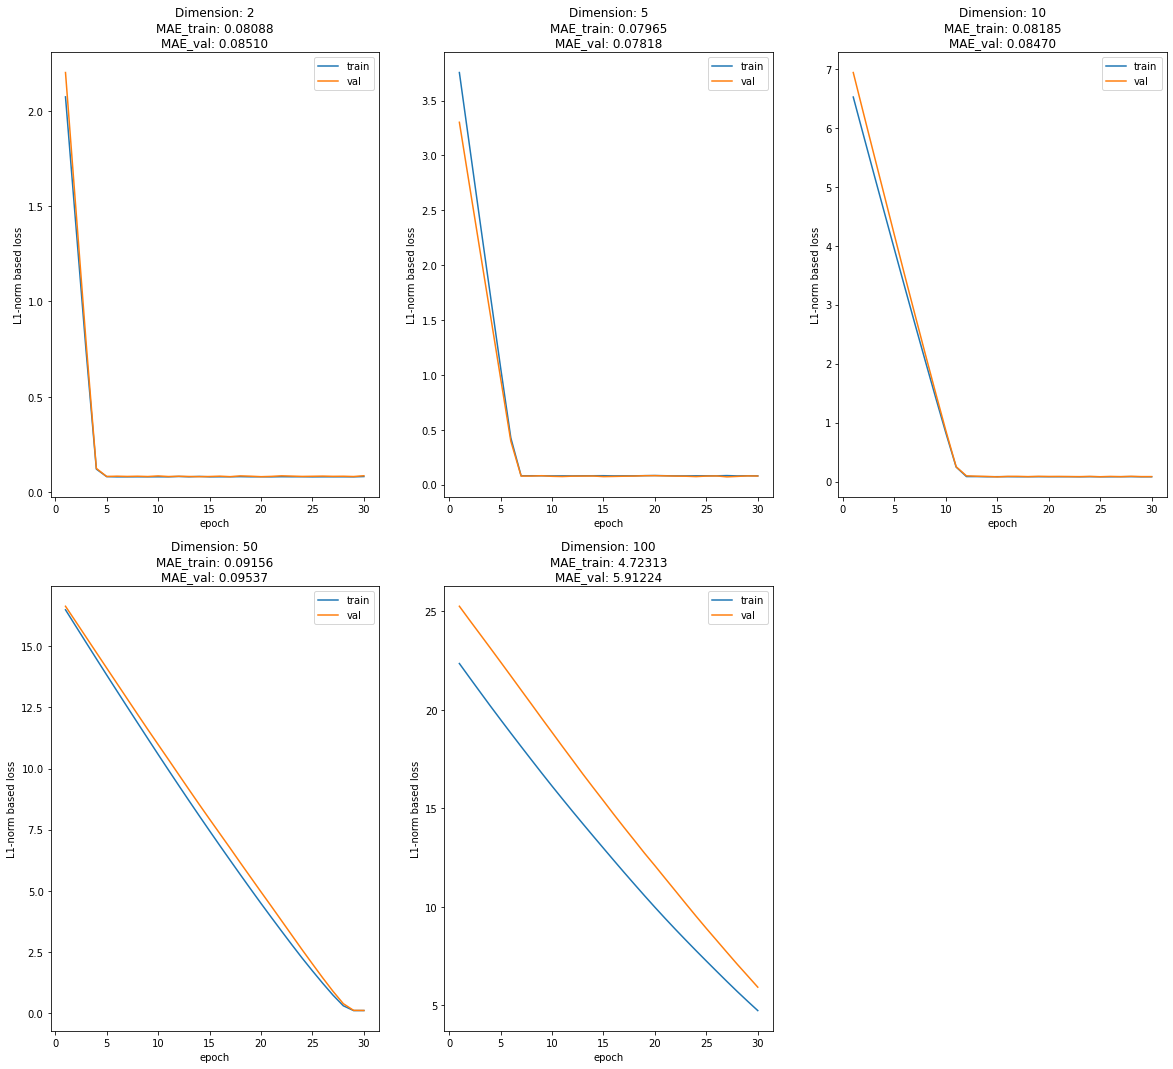

In [13]:
plt.figure(figsize=(20,18))
for i, tmpD in enumerate([2,5,10,50,100]):
    plt.subplot(2,3,i+1)
    experiment(d=tmpD,title=f"Dimension: {tmpD}")

The higher the number of features, the slower the convergence. The increase in the number of features does not guarantee an improvement in Mean Absolute Error(MAE). In fact, when the number of features is too large, the MAE increases drastically.

#### Different values of noise variance

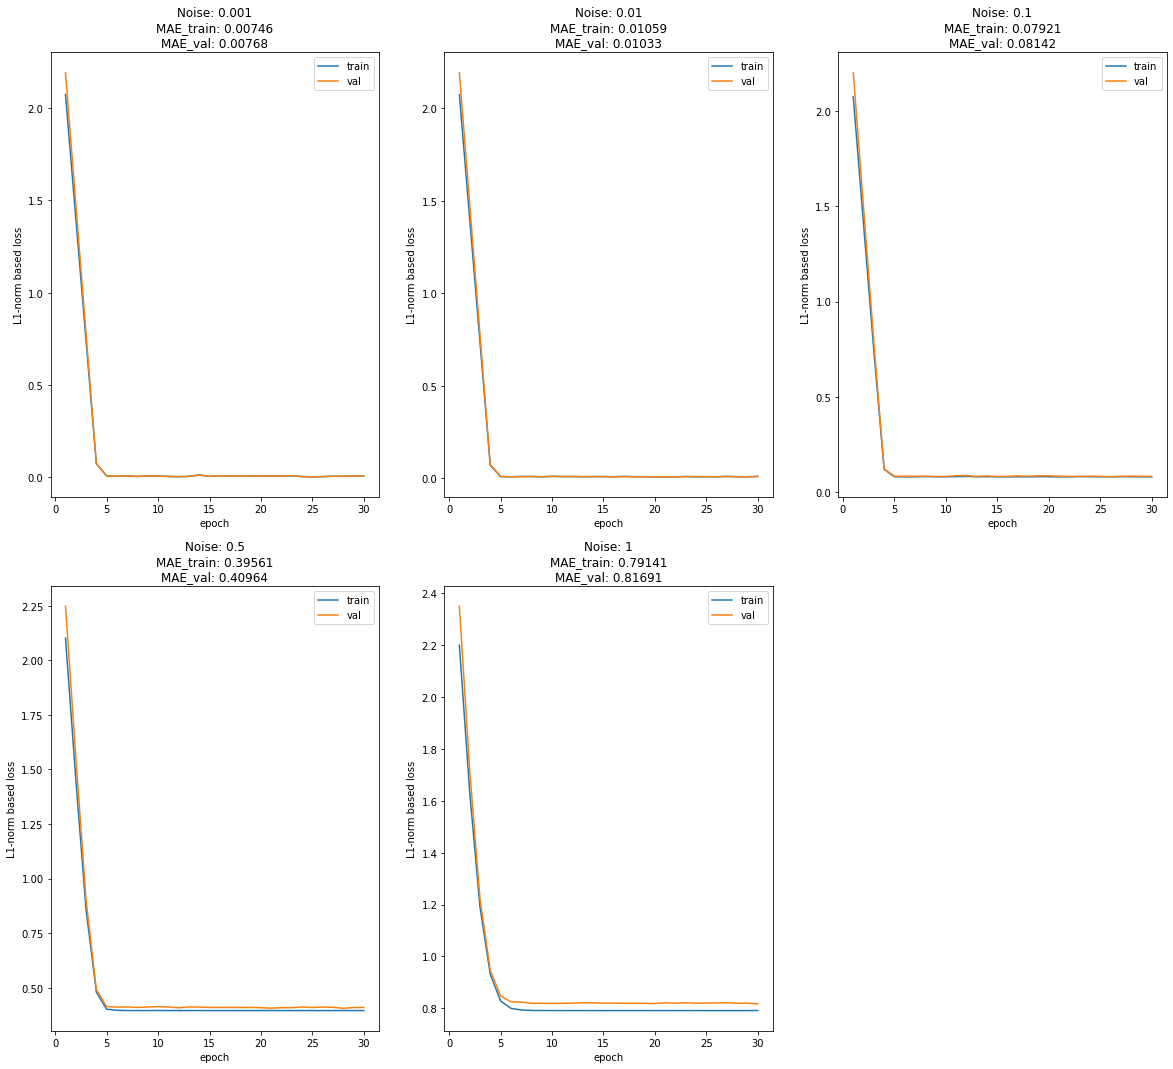

In [14]:
plt.figure(figsize=(20,18))
for i, tmpVar in enumerate([0.001,0.01,0.1,0.5,1]):
    plt.subplot(2,3,i+1)
    experiment(var=tmpVar,title=f"Noise: {tmpVar}")

The variance of noise does not seem to drastically affect the convergence speed. Increase in variance of noise seems to smoothen the loss curve and increase the distance between the loss curve for train and validation. High noise variance tends to result in high MAE.

#### Different values of learning rate

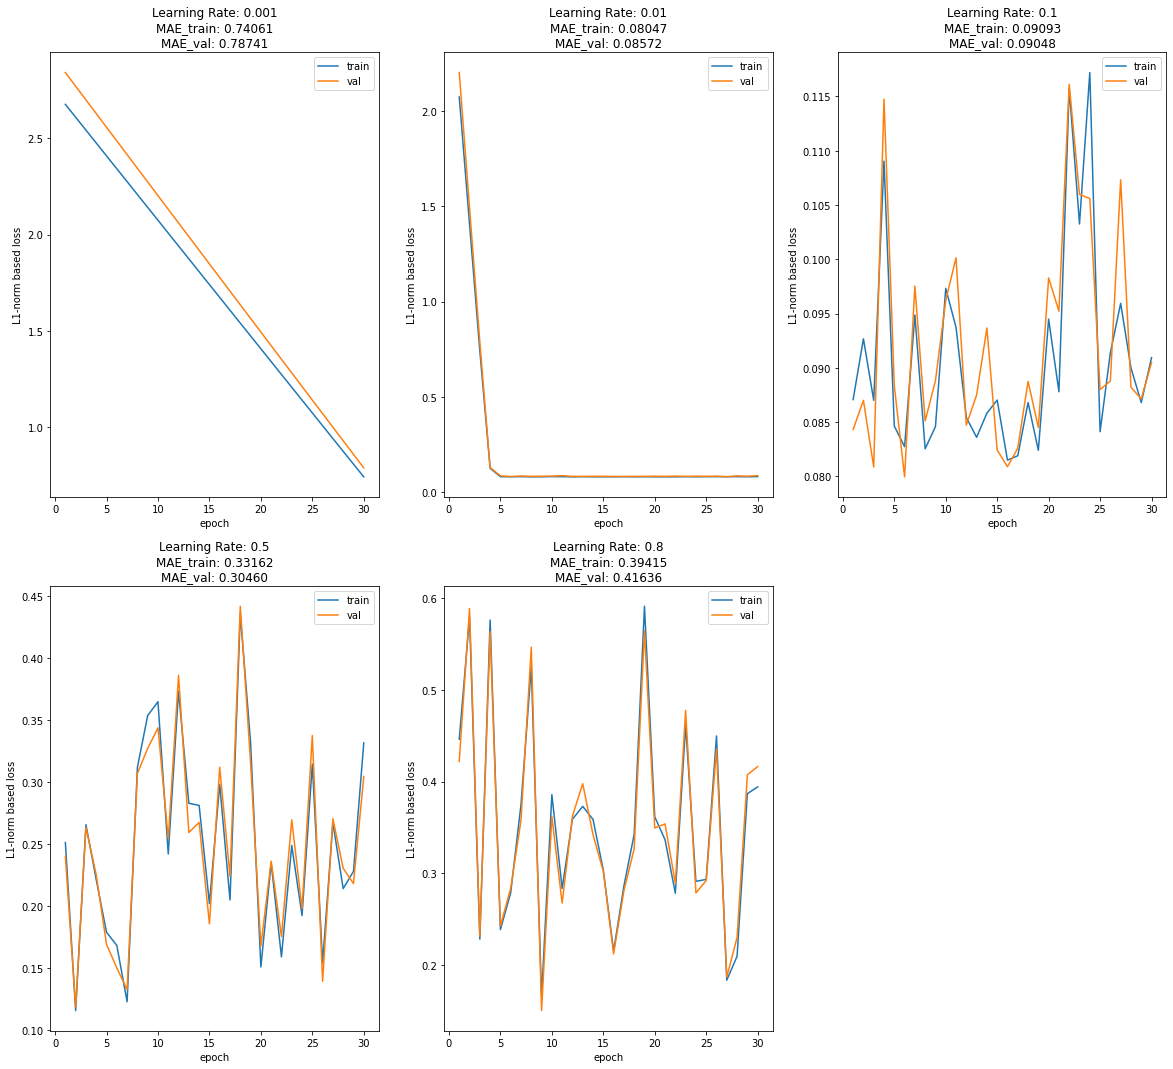

In [18]:
plt.figure(figsize=(20,18))
for i, tmpLr in enumerate([0.001,0.01,0.1,0.5, 0.8]):
    plt.subplot(2,3,i+1)
    experiment(lr=tmpLr,title=f"Learning Rate: {tmpLr}")

When the learning rate is very small at 0.001, the convergence speed is slow. Increase in learning rate from 0.001 to 0.01 results in increase in convergence speed. At learning rate of 0.1,0.5 and 0.8, oscillating convergence is shown. MAE seems to be the lowest when learning rate is at 0.01.

#### Different values of batch size

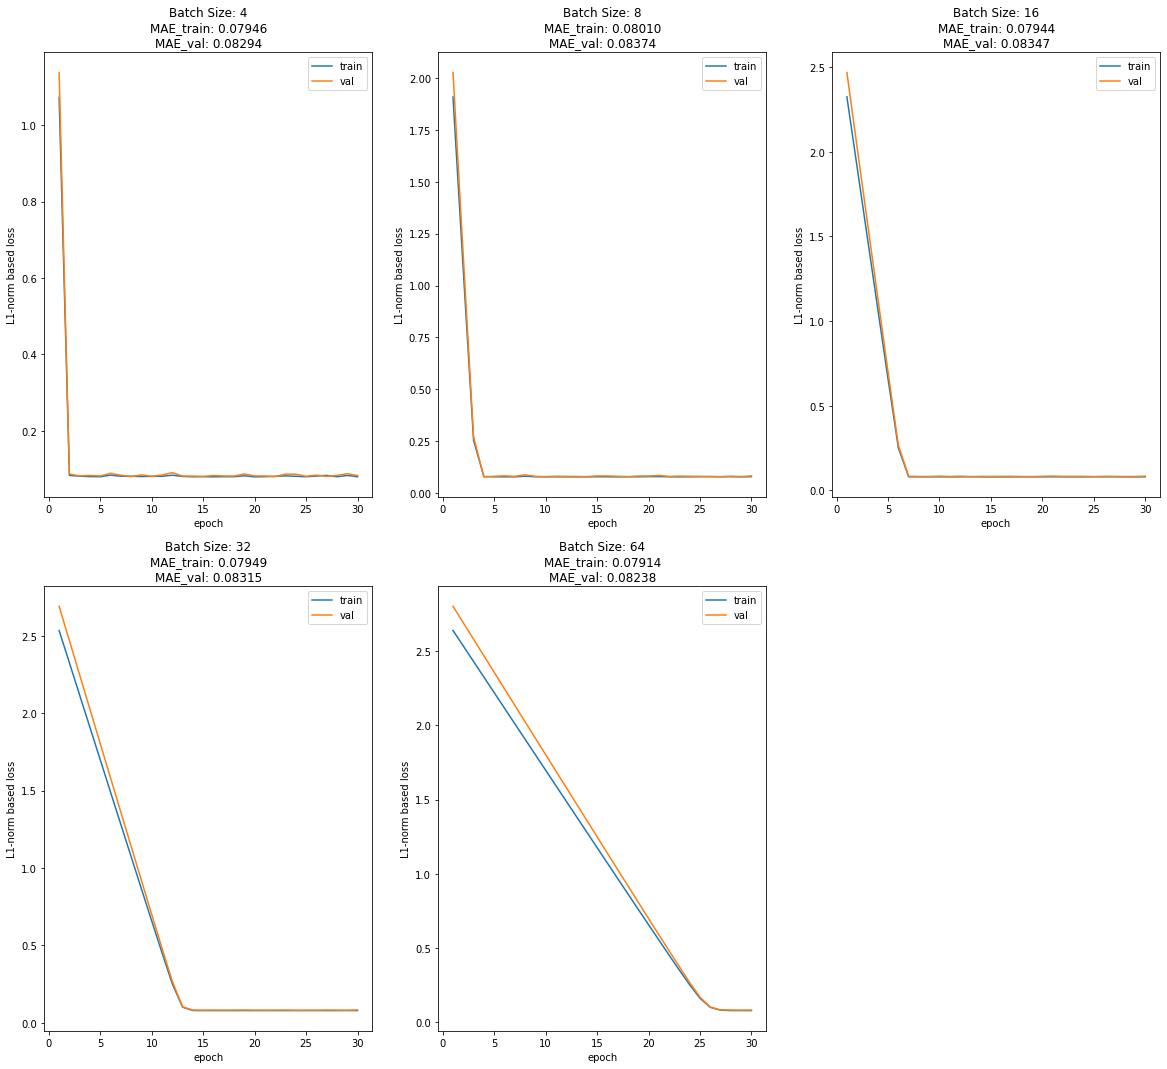

In [16]:
plt.figure(figsize=(20,18))
for i, tmpBs in enumerate([4,8,16,32,64]):
    plt.subplot(2,3,i+1)
    experiment(bs=tmpBs,title=f"Batch Size: {tmpBs}")

The smaller the values of batch size, the faster the convergence. The values of batch size does not significantly impact the MAE.

#### Different values for number of epochs

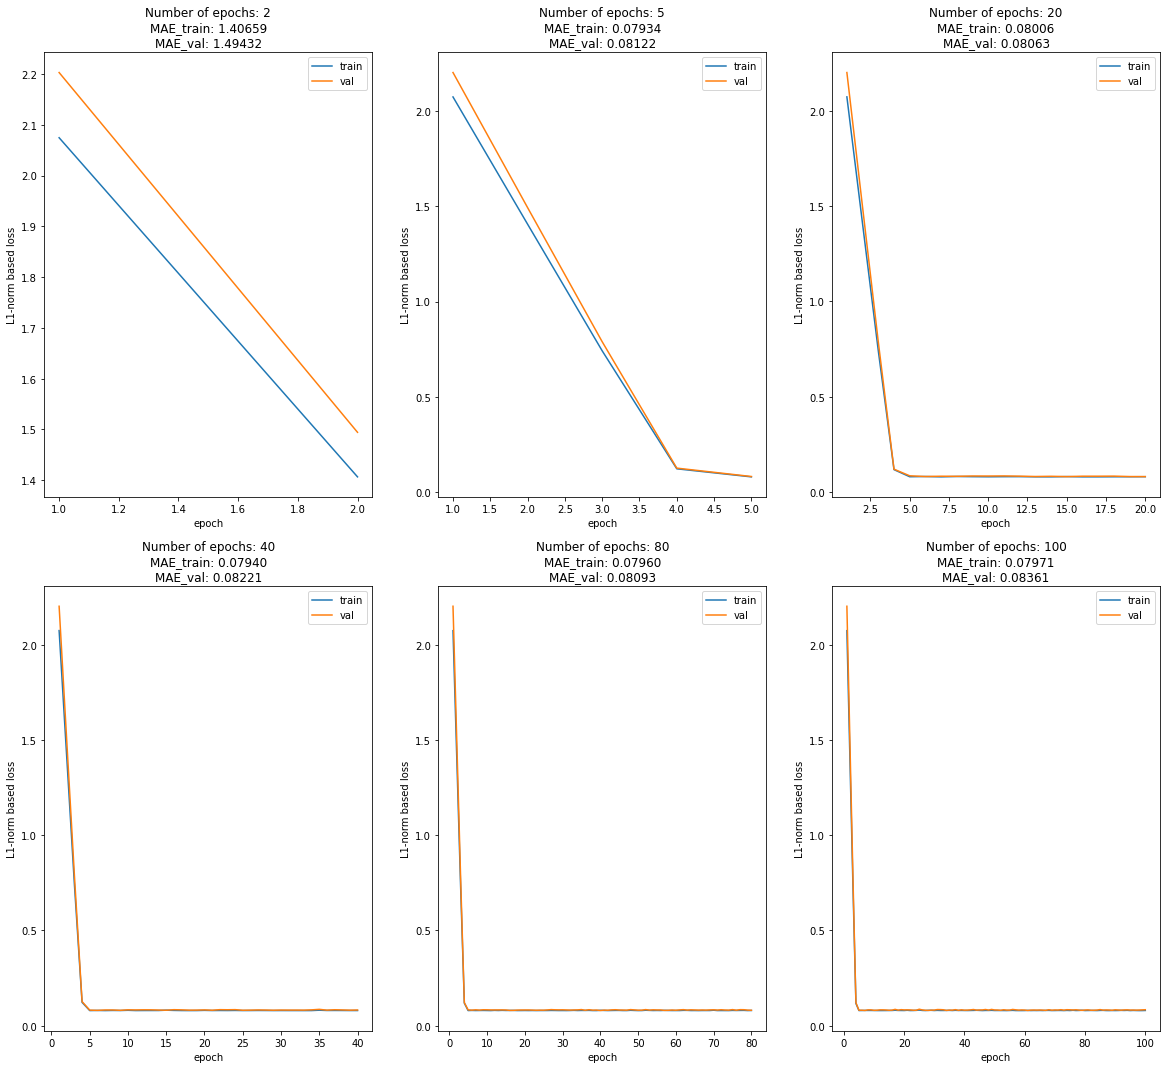

In [17]:
plt.figure(figsize=(20,18))
for i, tmpNepochs in enumerate([2,5,20,40,80,100]):
    plt.subplot(2,3,i+1)
    experiment(nepochs=tmpNepochs,title=f"Number of epochs: {tmpNepochs}")


The number of epochs does not seem to affect the convergence speed. When the number of epoch increases from 2 to 5, there is a drastic decrease in MAE. The MAE does not seem to improve by increasing the number of epoch from 5 to 20,40,80,and 100. 